# Logistic Regression (MNIST)
### (preliminary: logistic model)
## 1. Library, Data, Preprocessing (Split, Normalize)
## 2. Solve logistic model with Tensorflow
## 3. Show the result with confusion matrix

# Library

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist

# Load data

In [2]:
# load data
data = mnist.load_data()
# data
print('type(data): ', type(data))
print('len(data): ', len(data))

type(data):  <class 'tuple'>
len(data):  2


# train, test split

In [3]:
# train, test split
train_data, test_data = data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

len(train_data):  2
len(test_data):  2


# X, y split

In [4]:
# train data X, y split
x_train, y_train = train_data
print('x_train.shape, y_train.shape')
print(x_train.shape, y_train.shape)

# test data X, y split
x_test, y_test = test_data
print('x_test.shape, y_test.shape')
print(x_test.shape, y_test.shape)

x_train.shape, y_train.shape
(60000, 28, 28) (60000,)
x_test.shape, y_test.shape
(10000, 28, 28) (10000,)


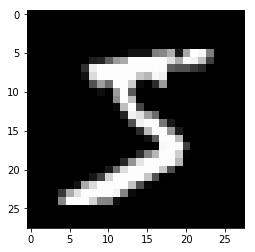

y_train:  [5 0 4 ..., 5 6 8]
x_train[0]:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0 

In [5]:
plt.figure()
plt.imshow(x_train[0], 'gray')
plt.show()
print('y_train: ', y_train)
print('x_train[0]: ', x_train[0])

## Load data (train/test split, X/y split)

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data shape

In [7]:
# data shape
shape = x_train.shape[1:]
print('shape: ', shape)

shape:  (28, 28)


# Data reshape, normalize

In [8]:
# Data normalize
reshaped_x_train = x_train.reshape(-1, 784)
reshaped_x_test = x_test.reshape(-1, np.prod(shape))

X_train = reshaped_x_train / 255.
X_test = reshaped_x_test / 255.

# Sparse label to one-hot label

In [9]:
print('10x10 Identity matrix \n', np.eye(10))
sparse_label = np.array([1, 3, 5, 7, 9])
print('sparse label: ', sparse_label)
print('sparse label to one hot label \n', np.eye(10)[sparse_label])

10x10 Identity matrix 
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
sparse label:  [1 3 5 7 9]
sparse label to one hot label 
 [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [10]:
Y_train = np.eye(10)[y_train]
Y_test = np.eye(10)[y_test]

# Data load, preprocess Sum-up

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 # original image data (28x28 per sample, unnormalized)
 # original image label (sparse encoding)
print('image shape: ', x_train.shape, x_test.shape)
print('label shape: ', y_train.shape, y_test.shape)

image shape:  (60000, 28, 28) (10000, 28, 28)
label shape:  (60000,) (10000,)


In [12]:
X_train, X_test # reshaped, normalized image data
Y_train, Y_test # one-hot encoding label
print('image shape: ', X_train.shape, X_test.shape)
print('label shape: ', Y_train.shape, Y_test.shape)

image shape:  (60000, 784) (10000, 784)
label shape:  (60000, 10) (10000, 10)


# Hyper parameter setting

In [13]:
# hypter parameter setting
learning_rate = .1
training_epochs = 100
display_step = 5

# Model

In [14]:
# build model and optimizer
tf_X = tf.placeholder(tf.float32, [None, 784])
tf_Y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

pred = tf.nn.softmax(tf.matmul(tf_X, W) + b)

# cross entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(
    tf_Y * tf.log(pred)
    , axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Train

In [15]:
# train
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for epoch in range(0, training_epochs):    
    sess.run(optimizer, feed_dict={tf_X: X_train, tf_Y: Y_train}) 

print("최적화 완료") 

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print("정확도:", accuracy_eval) 


최적화 완료
정확도: 0.8707


# Confusion matrix

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = sess.run(pred, feed_dict={tf_X: X_test, tf_Y:Y_test})
confusion_matrix(
    y_test,
    np.argmax(y_test_pred, 1)) # y_pred


array([[ 946,    0,    3,    3,    0,    4,   15,    1,    8,    0],
       [   0, 1089,    5,    3,    1,    4,    4,    0,   29,    0],
       [  16,   19,  845,   26,   20,    0,   28,   22,   49,    7],
       [   5,    2,   22,  880,    1,   32,    8,   20,   26,   14],
       [   3,    8,    5,    0,  865,    1,   17,    2,   10,   71],
       [  24,   15,    7,   74,   25,  650,   27,   11,   42,   17],
       [  20,    5,   13,    2,   13,   20,  879,    0,    6,    0],
       [   4,   38,   25,    1,   13,    0,    4,  889,   10,   44],
       [  10,   16,   13,   40,   12,   22,   18,   14,  809,   20],
       [  14,   13,   11,   12,   53,   11,    1,   28,   11,  855]])

In [17]:
# train
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
losses = [] ### add losses
for epoch in range(0, training_epochs):
    _, l = sess.run([optimizer, loss], feed_dict={tf_X: X_train, tf_Y: Y_train}) 
    
    losses += [l] ### add losses
    if (epoch + 1) % display_step == 0:
        print("Epoch:", epoch + 1, "\tLoss:", l) 

print("최적화 완료") 

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print("정확도:", accuracy_eval) 

Epoch: 5 	Loss: 1.92906
Epoch: 10 	Loss: 1.5986438
Epoch: 15 	Loss: 1.3717645
Epoch: 20 	Loss: 1.2122684
Epoch: 25 	Loss: 1.0960882
Epoch: 30 	Loss: 1.0083586
Epoch: 35 	Loss: 0.9399633
Epoch: 40 	Loss: 0.8851725
Epoch: 45 	Loss: 0.84026474
Epoch: 50 	Loss: 0.8027456
Epoch: 55 	Loss: 0.7708935
Epoch: 60 	Loss: 0.7434759
Epoch: 65 	Loss: 0.7195982
Epoch: 70 	Loss: 0.69859004
Epoch: 75 	Loss: 0.67994374
Epoch: 80 	Loss: 0.66326493
Epoch: 85 	Loss: 0.64824146
Epoch: 90 	Loss: 0.6346275
Epoch: 95 	Loss: 0.62222445
Epoch: 100 	Loss: 0.6108681
최적화 완료
정확도: 0.8707


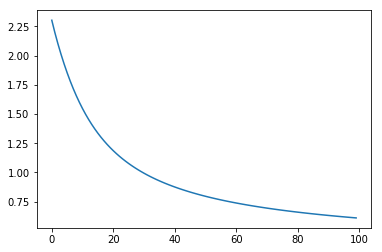

In [18]:
plt.figure()
plt.plot(losses)
plt.show()

# Model

In [22]:
# build model and optimizer
tf_X = tf.placeholder(tf.float32, [None, 784])
tf_Y = tf.placeholder(tf.float32, [None, 10])

logit = tf.layers.dense(tf_X, 10)
pred = tf.nn.softmax(logit)

# cross entropy loss
loss = tf.losses.softmax_cross_entropy(tf_Y, logit)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Train

In [23]:
# train
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for epoch in range(0, training_epochs):    
    sess.run(optimizer, feed_dict={tf_X: X_train, tf_Y: Y_train}) 

print("최적화 완료") 

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print("정확도:", accuracy_eval) 


최적화 완료
정확도: 0.8652


# Confusion matrix

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = sess.run(pred, feed_dict={tf_X: X_test, tf_Y:Y_test})
confusion_matrix(
    y_test,
    np.argmax(y_test_pred, 1)) # y_pred


array([[ 942,    0,    5,    4,    0,    7,   13,    1,    8,    0],
       [   0, 1091,    7,    3,    1,    3,    4,    0,   26,    0],
       [  14,   16,  852,   20,   17,    1,   29,   24,   55,    4],
       [   5,    3,   22,  878,    1,   37,    7,   18,   30,    9],
       [   2,    9,    5,    2,  862,    1,   21,    2,   12,   66],
       [  21,   16,    6,   79,   23,  642,   30,   16,   41,   18],
       [  21,    4,   16,    2,   19,   24,  868,    0,    4,    0],
       [   6,   35,   29,    2,   11,    0,    2,  884,   10,   49],
       [   9,   15,   15,   44,    9,   29,   19,   16,  795,   23],
       [  15,   13,   10,   14,   55,   10,    3,   36,   15,  838]])

In [25]:
# train
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
losses = [] ### add losses
for epoch in range(0, training_epochs):
    _, l = sess.run([optimizer, loss], feed_dict={tf_X: X_train, tf_Y: Y_train}) 
    
    losses += [l] ### add losses
    if (epoch + 1) % display_step == 0:
        print("Epoch:", epoch + 1, "\tLoss:", l) 

print("최적화 완료") 

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict={tf_X: X_test, tf_Y: Y_test})
print("정확도:", accuracy_eval) 


Epoch: 5 	Loss: 1.9922041
Epoch: 10 	Loss: 1.6495129
Epoch: 15 	Loss: 1.412162
Epoch: 20 	Loss: 1.2443465
Epoch: 25 	Loss: 1.1219466
Epoch: 30 	Loss: 1.0296193
Epoch: 35 	Loss: 0.95779353
Epoch: 40 	Loss: 0.90040624
Epoch: 45 	Loss: 0.8535023
Epoch: 50 	Loss: 0.8144262
Epoch: 55 	Loss: 0.781337
Epoch: 60 	Loss: 0.75292486
Epoch: 65 	Loss: 0.7282366
Epoch: 70 	Loss: 0.70656145
Epoch: 75 	Loss: 0.6873591
Epoch: 80 	Loss: 0.6702081
Epoch: 85 	Loss: 0.65478575
Epoch: 90 	Loss: 0.6408294
Epoch: 95 	Loss: 0.62812793
Epoch: 100 	Loss: 0.6165113
최적화 완료
정확도: 0.8675


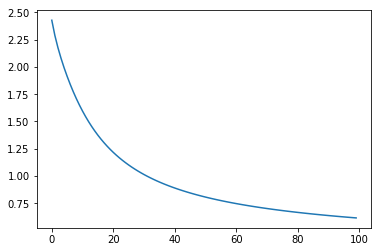

In [26]:
plt.figure()
plt.plot(losses)
plt.show()